<a href="https://colab.research.google.com/github/rubyvanrooyen/notebooks/blob/main/getting_started/image_from_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tim Molteno (2018-2019)   
tim@elec.ac.nz

Simple TART imaging script from api visibilities.

This requires the TART `api_imaging` and `api_handler` packages to be installed on your system from the public repositories:

`sudo pip3 install tart_tools`

## Installation

In [1]:
!pip install tart tart-tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 9.1 MB/s 
     |████████████████████████████████| 23.7 MB 1.8 MB/s 


## Input

In [2]:
#@markdown The API server URL identifies which TART telescope to use.
API_SERVER = "https://tart.elec.ac.nz/signal" #@param {type:"string"}

## Script

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from tart_tools import api_imaging
from tart_tools import api_handler

### STEP 1

Get telescope configuration (config), visibility data, and calibration data (gains) from the server

In [4]:
print("Downloading data from {}".format(API_SERVER))
api = api_handler.APIhandler(API_SERVER)

config = api_handler.get_config(api)
mode = api.get('mode/current')

if mode['mode'] != 'vis':
    print("ERROR: Telescope must be in visibility mode to allow imaging. Set via the web API")

gains = api.get('calibration/gain')
visibility_data = api.get('imaging/vis')

### STEP 2

Apply Calibration to the visiblilties

In [5]:
print("Apply Calibration Data")
cv, timestamp = api_imaging.vis_calibrated(visibility_data, config, gains['gain'], gains['phase_offset'], flag_list=[])

Apply Calibration Data


### STEP 3

Perform the imaging

In [6]:
print("Generate Dirty Image")
n_bin = 2**9  # Image resolution
cal_ift, cal_extent, n_fft, bin_width = api_imaging.image_from_calibrated_vis(cv, nw=n_bin/4, num_bin=n_bin)

# Take the absolute value
img = np.abs(cal_ift)

# Scale it to multiples of the image standard deviation
sd = np.std(img)
scaled_image = img/sd

Generate Dirty Image


### STEP 4

Save the file (with a timestamp)

Dynamic Range: 17.224560842770405
Saving image as snapshot_2022_10_13_14_08_50_UTC.png


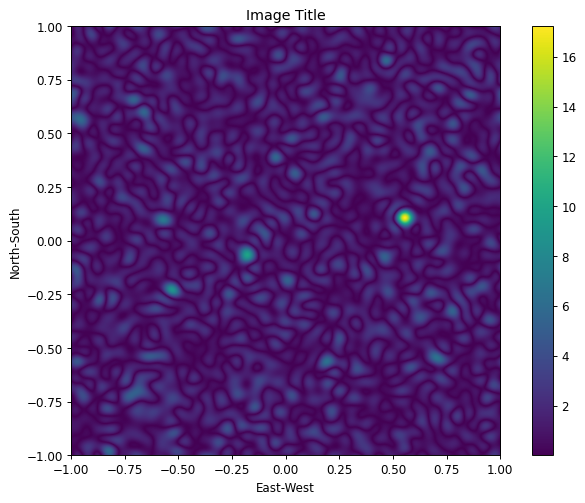

In [7]:
time_repr = "{:%Y_%m_%d_%H_%M_%S_%Z}".format(timestamp)
fname = 'snapshot_{}.png'.format(time_repr)
api_imaging.make_image(plt, scaled_image, "Image Title", n_bin, None, False)
print("Saving image as {}".format(fname))
plt.savefig(fname)